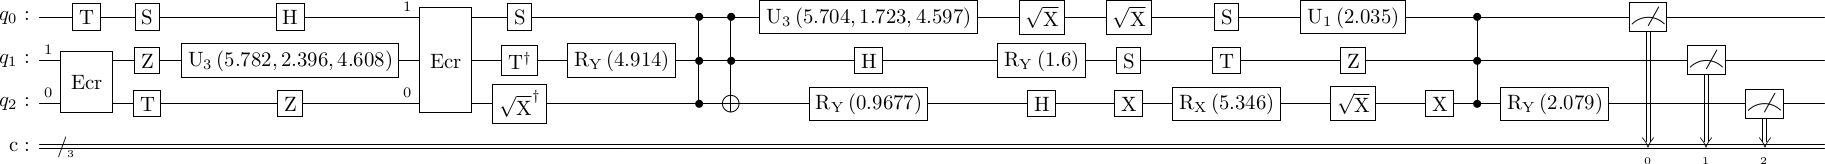

In [21]:
from qiskit.circuit.random import random_circuit
 
number_qubit = 3
depth = 15
circ = random_circuit(number_qubit, depth, measure=True)
circ.draw(output='latex')


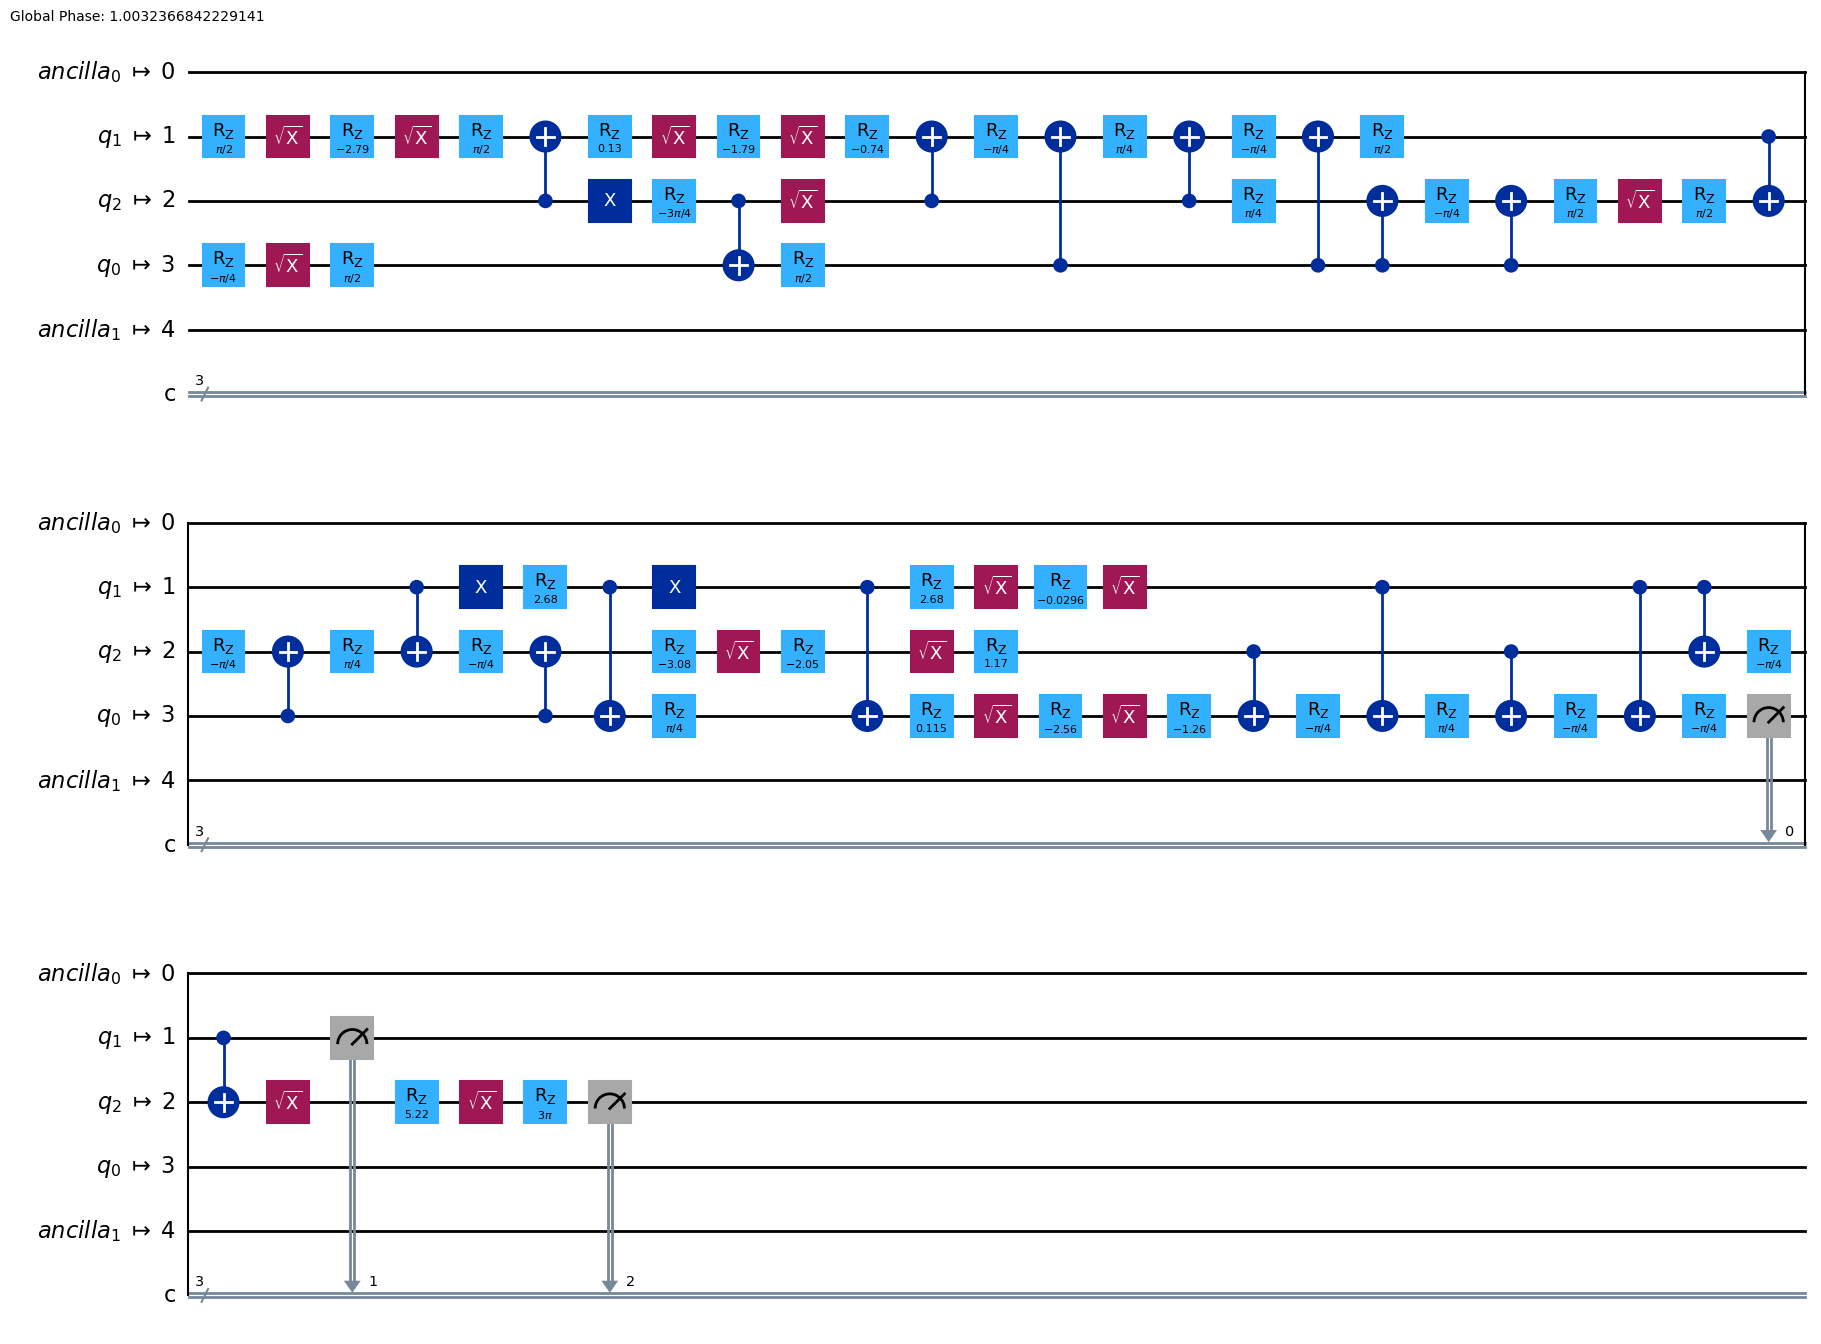

In [30]:
from qiskit import transpile
from qiskit import QuantumCircuit
from qiskit.providers.fake_provider import GenericBackendV2
 
backend = GenericBackendV2(5)
qc_basis = transpile(circ, backend, optimization_level=3)
qc_basis.draw(output='mpl')

In [22]:
# Circuit convert to OPENQASM
from qiskit.qasm2 import dumps
qasm_str = dumps(circ)

print(qasm_str)


OPENQASM 2.0;
include "qelib1.inc";
gate rzx(param0) q0,q1 { h q1; cx q0,q1; rz(param0) q1; cx q0,q1; h q1; }
gate ecr q0,q1 { rzx(pi/4) q0,q1; x q0; rzx(-pi/4) q0,q1; }
gate ccz q0,q1,q2 { h q2; ccx q0,q1,q2; h q2; }
qreg q[3];
creg c[3];
t q[0];
ecr q[2],q[1];
s q[0];
t q[2];
z q[1];
h q[0];
z q[2];
u3(5.782289447791593,2.395776295349692,4.6075624429552375) q[1];
ecr q[2],q[0];
tdg q[1];
s q[0];
ry(4.914123597404718) q[1];
sxdg q[2];
ccz q[0],q[2],q[1];
ccx q[0],q[1],q[2];
u3(5.7042337829296015,1.722807788016196,4.597291856668242) q[0];
h q[1];
ry(0.9677391017921934) q[2];
h q[2];
sx q[0];
ry(1.6003571815057418) q[1];
x q[2];
sx q[0];
s q[0];
s q[1];
rx(5.345724846500645) q[2];
sx q[2];
t q[1];
u1(2.034803763213174) q[0];
z q[1];
x q[2];
ccz q[1],q[2],q[0];
ry(2.078619723836456) q[2];
measure q[0] -> c[0];
measure q[1] -> c[1];
measure q[2] -> c[2];


In [23]:
from quantastica.qps_api import QPS

QPS.save_account("rxBbSgeGgFPJiHZk9DAQJwn5hiqGmoiuzb")

input_program = qasm_str

output_program = QPS.converter.convert(input_program, "qasm", "qiskit")

print(output_program)

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import execute, Aer
import numpy as np

backend = Aer.get_backend("qasm_simulator")

shots = 1024

def rzx(qc, param0, a, b):
  qc.h(b)
  qc.cx(a, b)
  qc.rz(param0, b)
  qc.cx(a, b)
  qc.h(b)

def ecr(qc, a, b):
  qc.h(b)
  qc.cx(a, b)
  qc.rz((np.pi / 4), b)
  qc.cx(a, b)
  qc.h(b)
  qc.x(a)
  qc.h(b)
  qc.cx(a, b)
  qc.rz((-np.pi / 4), b)
  qc.cx(a, b)
  qc.h(b)

def ccz(qc, a, b, c):
  qc.h(c)
  qc.ccx(a, b, c)
  qc.h(c)

qc = QuantumCircuit()

q = QuantumRegister(3, 'q')
c = ClassicalRegister(3, 'c')

qc.add_register(q)
qc.add_register(c)

qc.t(q[0])
ecr(qc, q[2], q[1])
qc.s(q[0])
qc.z(q[1])
qc.t(q[2])
qc.h(q[0])
qc.u(5.782289447791593, 2.395776295349692, 4.6075624429552375, q[1])
qc.z(q[2])
ecr(qc, q[2], q[0])
qc.s(q[0])
qc.tdg(q[1])
qc.sxdg(q[2])
qc.ry(4.914123597404718, q[1])
ccz(qc, q[0], q[2], q[1])
qc.ccx(q[0], q[1], q[2])
qc.u(5.7042337829296015, 1.722807788016196, 4.597291856668242, q[0])
qc.

In [24]:
output_program = QPS.converter.convert(input_program, "qasm", "quil")

print(output_program)

DEFGATE u3(%theta, %phi, %lambda):
    COS(%theta/2), -1*EXP(i*%lambda)*SIN(%theta/2)
    EXP(i*%phi)*SIN(%theta/2), EXP(i*%lambda + i*%phi)*COS(%theta/2)

DEFGATE srn:
    0.5+0.5i, 0.5-0.5i
    0.5-0.5i, 0.5+0.5i

DEFGATE srndg:
    0.5-0.5i, 0.5+0.5i
    0.5+0.5i, 0.5-0.5i


DECLARE ro BIT[3]
T 0
H 1
CNOT 2 1
RZ ((pi / 4)) 1
CNOT 2 1
H 1
X 2
H 1
CNOT 2 1
RZ ((-pi / 4)) 1
CNOT 2 1
H 1
S 0
Z 1
T 2
H 0
u3 (5.782289447791593, 2.395776295349692, 4.6075624429552375) 1
Z 2
H 0
CNOT 2 0
RZ ((pi / 4)) 0
CNOT 2 0
H 0
X 2
H 0
CNOT 2 0
RZ ((-pi / 4)) 0
CNOT 2 0
H 0
S 0
PHASE (-pi / 4) 1
srndg 2
RY (4.914123597404718) 1
H 1
CCNOT 0 2 1
H 1
CCNOT 0 1 2
u3 (5.7042337829296015, 1.722807788016196, 4.597291856668242) 0
H 1
RY (0.9677391017921934) 2
srn 0
RY (1.6003571815057418) 1
H 2
srn 0
S 1
X 2
S 0
T 1
RX (5.345724846500645) 2
PHASE (2.034803763213174) 0
Z 1
srn 2
X 2
H 0
CCNOT 1 2 0
H 0
RY (2.078619723836456) 2
MEASURE 0 ro[0]
MEASURE 1 ro[1]
MEASURE 2 ro[2]



In [25]:
output_program = QPS.converter.convert(input_program, "qasm", "cirq")

print(output_program)

import cirq
import numpy as np
from functools import reduce

import cirq
import numpy as np
from functools import reduce

param0 = 0

q = [cirq.NamedQubit('q' + str(i)) for i in range(2)]

circuit = cirq.Circuit(
    cirq.H(q[1]),
    cirq.CNOT(q[0], q[1]),
    cirq.rz(param0)(q[1]),
    cirq.CNOT(q[0], q[1]),
    cirq.H(q[1])
)

simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=1024)
result_dict = dict(result.multi_measurement_histogram(keys=[]))
keys = list(map(lambda arr: reduce(lambda x, y: str(x) + str(y), arr[::-1]), result_dict.keys()))
counts = dict(zip(keys,[value for value in result_dict.values()]))
print(counts)import cirq
import numpy as np
from functools import reduce

q = [cirq.NamedQubit('q' + str(i)) for i in range(2)]

circuit = cirq.Circuit(
    cirq.H(q[1]),
    cirq.CNOT(q[0], q[1]),
    cirq.rz((np.pi / 4))(q[1]),
    cirq.CNOT(q[0], q[1]),
    cirq.H(q[1]),
    cirq.X(q[0]),
    cirq.H(q[1]),
    cirq.CNOT(q[0], q[1]),
    cirq.rz((-np.pi / 

In [26]:
output_program = QPS.converter.convert(input_program, "qasm", "tfq")

print(output_program)

import tensorflow_quantum as tfq
import cirq
import numpy as np
from functools import reduce

import cirq
import numpy as np
from functools import reduce

param0 = 0

q = [cirq.NamedQubit('q' + str(i)) for i in range(2)]

circuit = cirq.Circuit(
    cirq.H(q[1]),
    cirq.CNOT(q[0], q[1]),
    cirq.rz(param0)(q[1]),
    cirq.CNOT(q[0], q[1]),
    cirq.H(q[1])
)

simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=1024)
result_dict = dict(result.multi_measurement_histogram(keys=[]))
keys = list(map(lambda arr: reduce(lambda x, y: str(x) + str(y), arr[::-1]), result_dict.keys()))
counts = dict(zip(keys,[value for value in result_dict.values()]))
print(counts)import cirq
import numpy as np
from functools import reduce

q = [cirq.NamedQubit('q' + str(i)) for i in range(2)]

circuit = cirq.Circuit(
    cirq.H(q[1]),
    cirq.CNOT(q[0], q[1]),
    cirq.rz((np.pi / 4))(q[1]),
    cirq.CNOT(q[0], q[1]),
    cirq.H(q[1]),
    cirq.X(q[0]),
    cirq.H(q[1]),
    cirq.CNOT(q[